- sparse-to-dense-overhead (sparse를 dense로 바꾸는 오버헤드가 크다는 것을 표현하는게 핵심)
    - x축
        - 3단계 (우측 matrix의 사이즈 단위로 small, medium, large)
        - 각 단계를 3단계로 추가 분할 (우측 matrix의 density 단위로 ex. 0.001, 0.01, 0.1)
    - y축
        - 좌측 y축 : sparse to dense latency
        - 우측 y축 : memory consumption
            - dense memory / sparse memory
            - sparse memory / dense memory
            - logscale(sparse memory / dense memory)
            - etc..

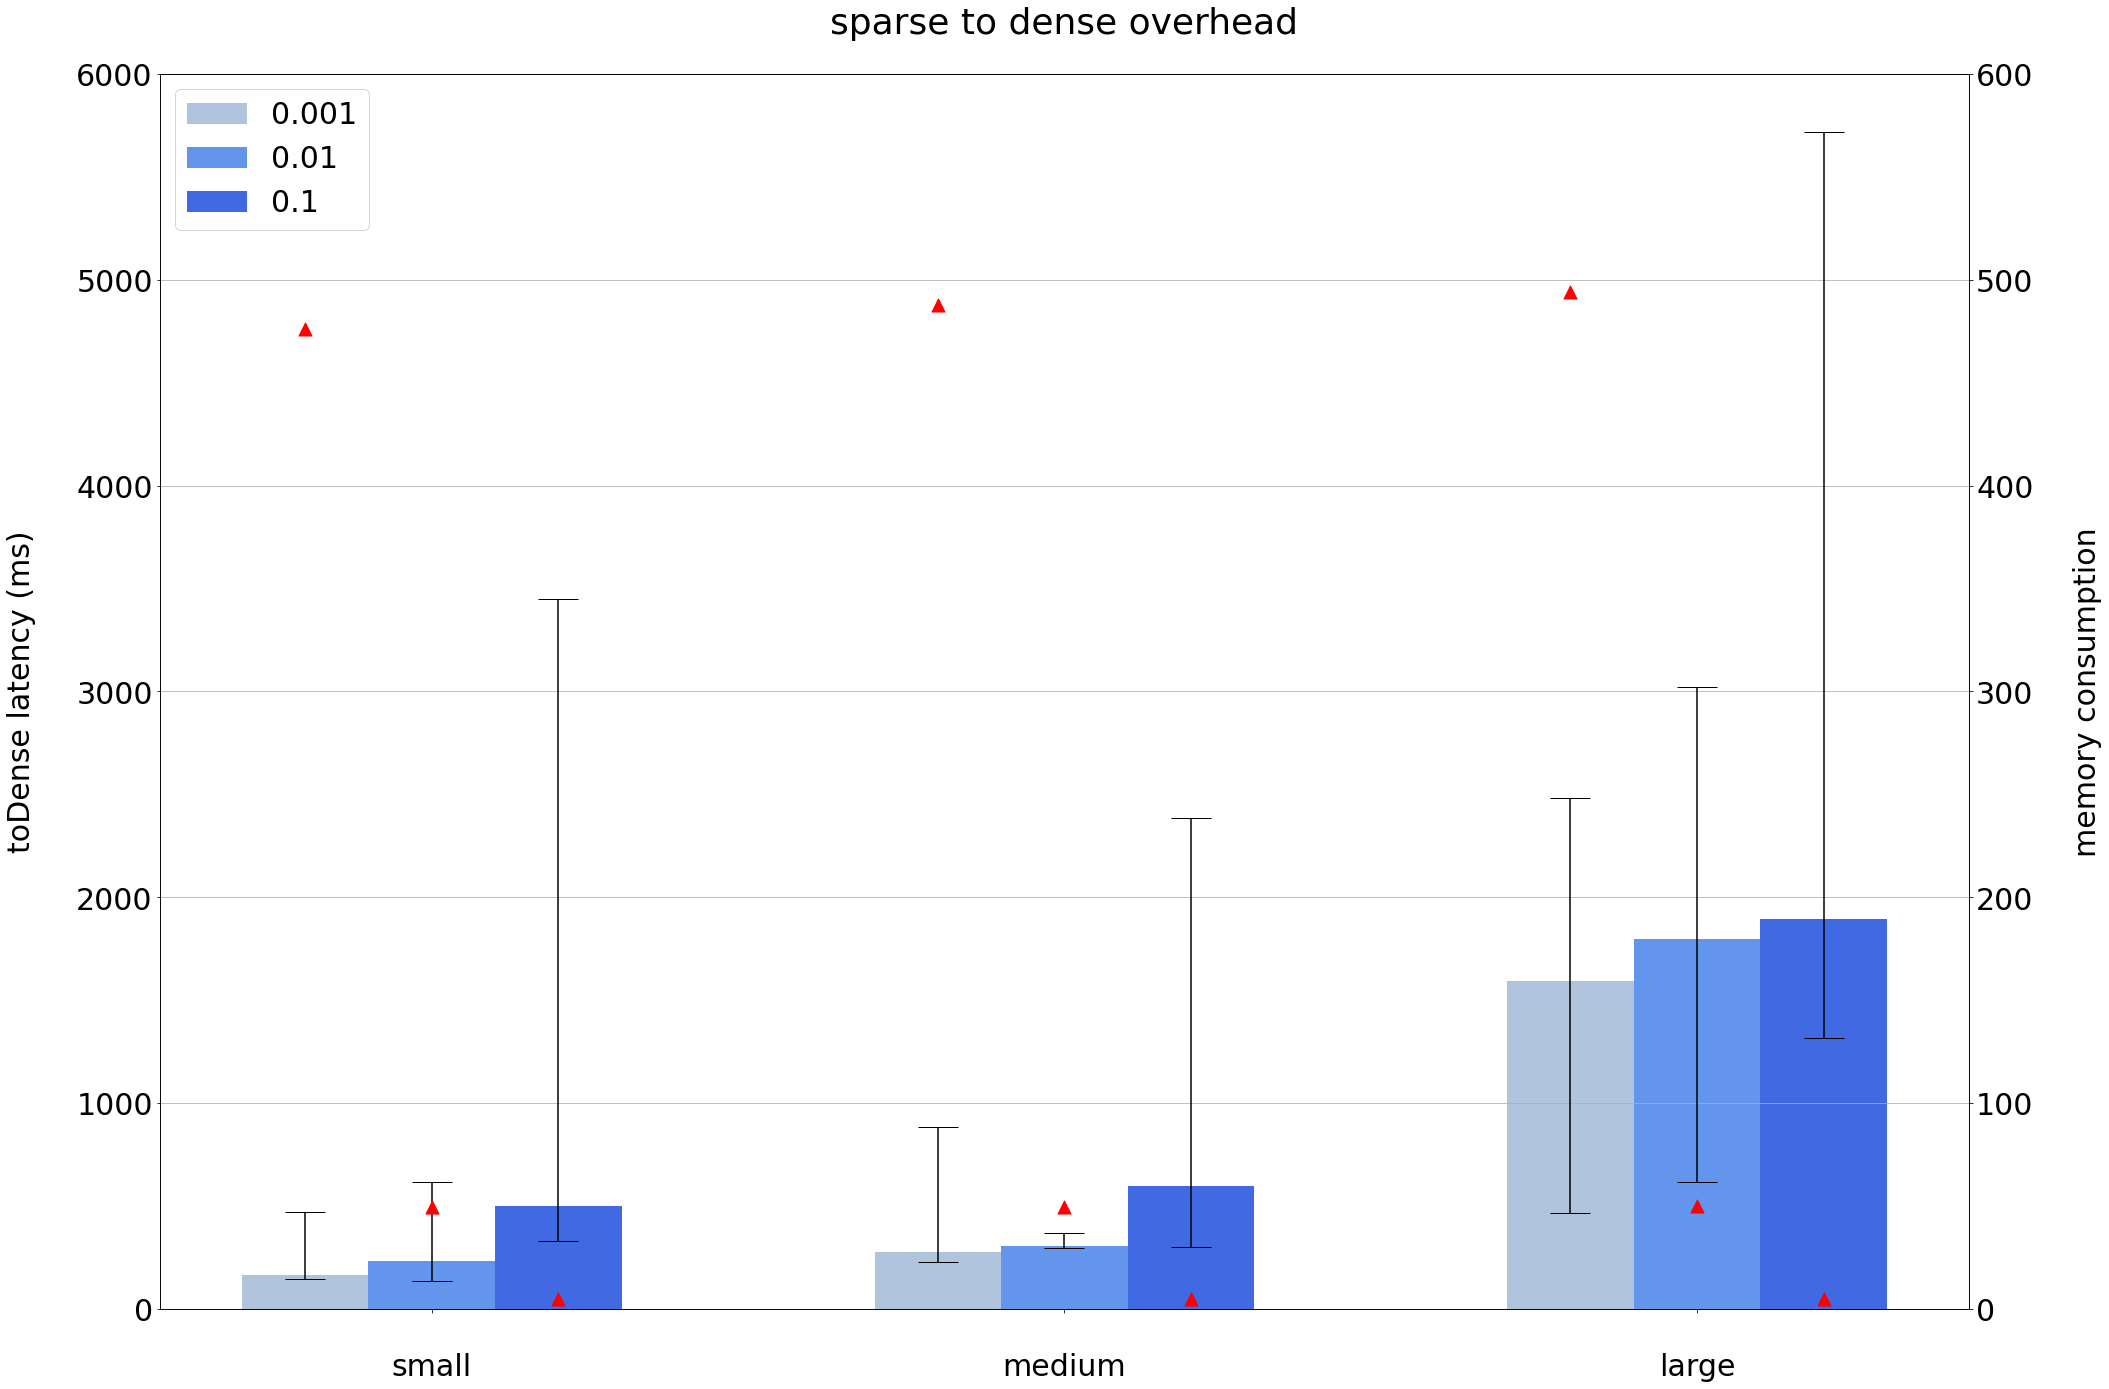

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정

sm_size = ["small", "medium", "large"]

################################# ax1 좌측 y ####################################################

# density 가 0.001 인 각 행렬의 sm to dense latency
sm_to_dense_0_001 = [165.53, 276.79, 1595.14]
min_0_001 = [149, 231, 469]
max_0_001 = [472, 887, 2481]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_001':sm_to_dense_0_001, 'min_0_001': min_0_001, 'max_0_001': max_0_001}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_001 - df.min_0_001
df['maxgap'] = df.max_0_001 - df.sm_to_dense_0_001
yerr_0_001 = df[['mingap', 'maxgap']].T.to_numpy()


# density 가 0.01 인 각 행렬의 sm to dense latency
sm_to_dense_0_01 = [232.6, 308.07, 1797.5]
min_0_01 = [138, 299, 617]
max_0_01 = [616, 369, 3024]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_01':sm_to_dense_0_01, 'min_0_01': min_0_01, 'max_0_01': max_0_01})

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_01 - df.min_0_01
df['maxgap'] = df.max_0_01 - df.sm_to_dense_0_01
yerr_0_01 = df[['mingap', 'maxgap']].T.to_numpy()


# density 가 0.1 인 각 행렬의 sm to dense latency
sm_to_dense_0_1 = [500.74, 599.01, 1896.14]
min_0_1 = [330, 304, 1318 ]
max_0_1 = [3447, 2384, 5715 ]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_1':sm_to_dense_0_1, 'min_0_1': min_0_1, 'max_0_1': max_0_1})

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_1 - df.min_0_1
df['maxgap'] = df.max_0_1 - df.sm_to_dense_0_1
yerr_0_1 = df[['mingap', 'maxgap']].T.to_numpy()

################################# ax1 우측 y ####################################################

# sm / dm
# small_memory_comsumption = [0.0021, 0.0201, 0.2001]
# medium_memory_comsumption = [0.00205, 0.02005, 0.20005]
# large_memory_comsumption = [0.002025, 0.020025, 0.200025]

# dm / sm
small_memory_comsumption = [476.1904761905, 49.7512437811, 4.9975012494]
medium_memory_comsumption = [487.8048780488, 49.8753117207, 4.9987503124]
large_memory_comsumption = [493.8271604938,  49.9375780275, 4.9993750781]


################################# x축 및 전체 figure 설정 ####################################################


x = np.arange(len(sm_size)) # x축 인덱스
width = 0.2 # bar 넓이

fig, ax1 = plt.subplots(figsize=(30,20)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x-0.2, sm_to_dense_0_001, width, yerr=yerr_0_001, label='0.001', color='lightsteelblue', capsize=20)
bar2 = ax1.bar(x, sm_to_dense_0_01, width, yerr=yerr_0_01, label='0.01', color='cornflowerblue', capsize=20)
bar3 = ax1.bar(x + 0.2, sm_to_dense_0_1, width, yerr=yerr_0_1, label='0.1', color='royalblue', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(sm_size) # x축 label 이름
ax1.tick_params(axis='x',pad=40) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 6000])  # 좌측 y축 범위 설정
ax1.set_ylabel('toDense latency (ms)', labelpad=40) # ax1 ylabel 설정

ax1.set_title('sparse to dense overhead', pad=40) # ax1 title 설정
ax1.legend() # 범례 표시

# 바 상단에 y축 값 표시
#ax1.bar_label(bar1, padding=3)
#ax1.bar_label(bar2, padding=3)
#ax1.bar_label(bar3, padding=3)

################################# ax2 ####################################################

ax2 = ax1.twinx()  # 동일한 x 축을 공유하는 두 번째 y축 생성

ax2.set_ylim([0, 600])  # 우측 y축 범위 설정
ax2.set_ylabel('memory consumption', labelpad=40) # ax2 ylabel 설정

x_small = np.array([-0.2, 0, 0.2])
x_medium = np.array([0.8, 1, 1.2])
x_large = np.array([1.8, 2, 2.2])
# ax2.plot(x_small, small_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)
# ax2.plot(x_medium, medium_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)
# ax2.plot(x_large, large_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)

ax2.scatter(x_small, small_memory_comsumption, color='red', marker='^', s=170)
ax2.scatter(x_medium, medium_memory_comsumption, color='red', marker='^', s=170)
ax2.scatter(x_large, large_memory_comsumption, color='red', marker='^', s=170)


ax2.tick_params(axis='y')


fig.tight_layout()
fig.savefig('./sparse-to-dense-overhead.png')
plt.show()


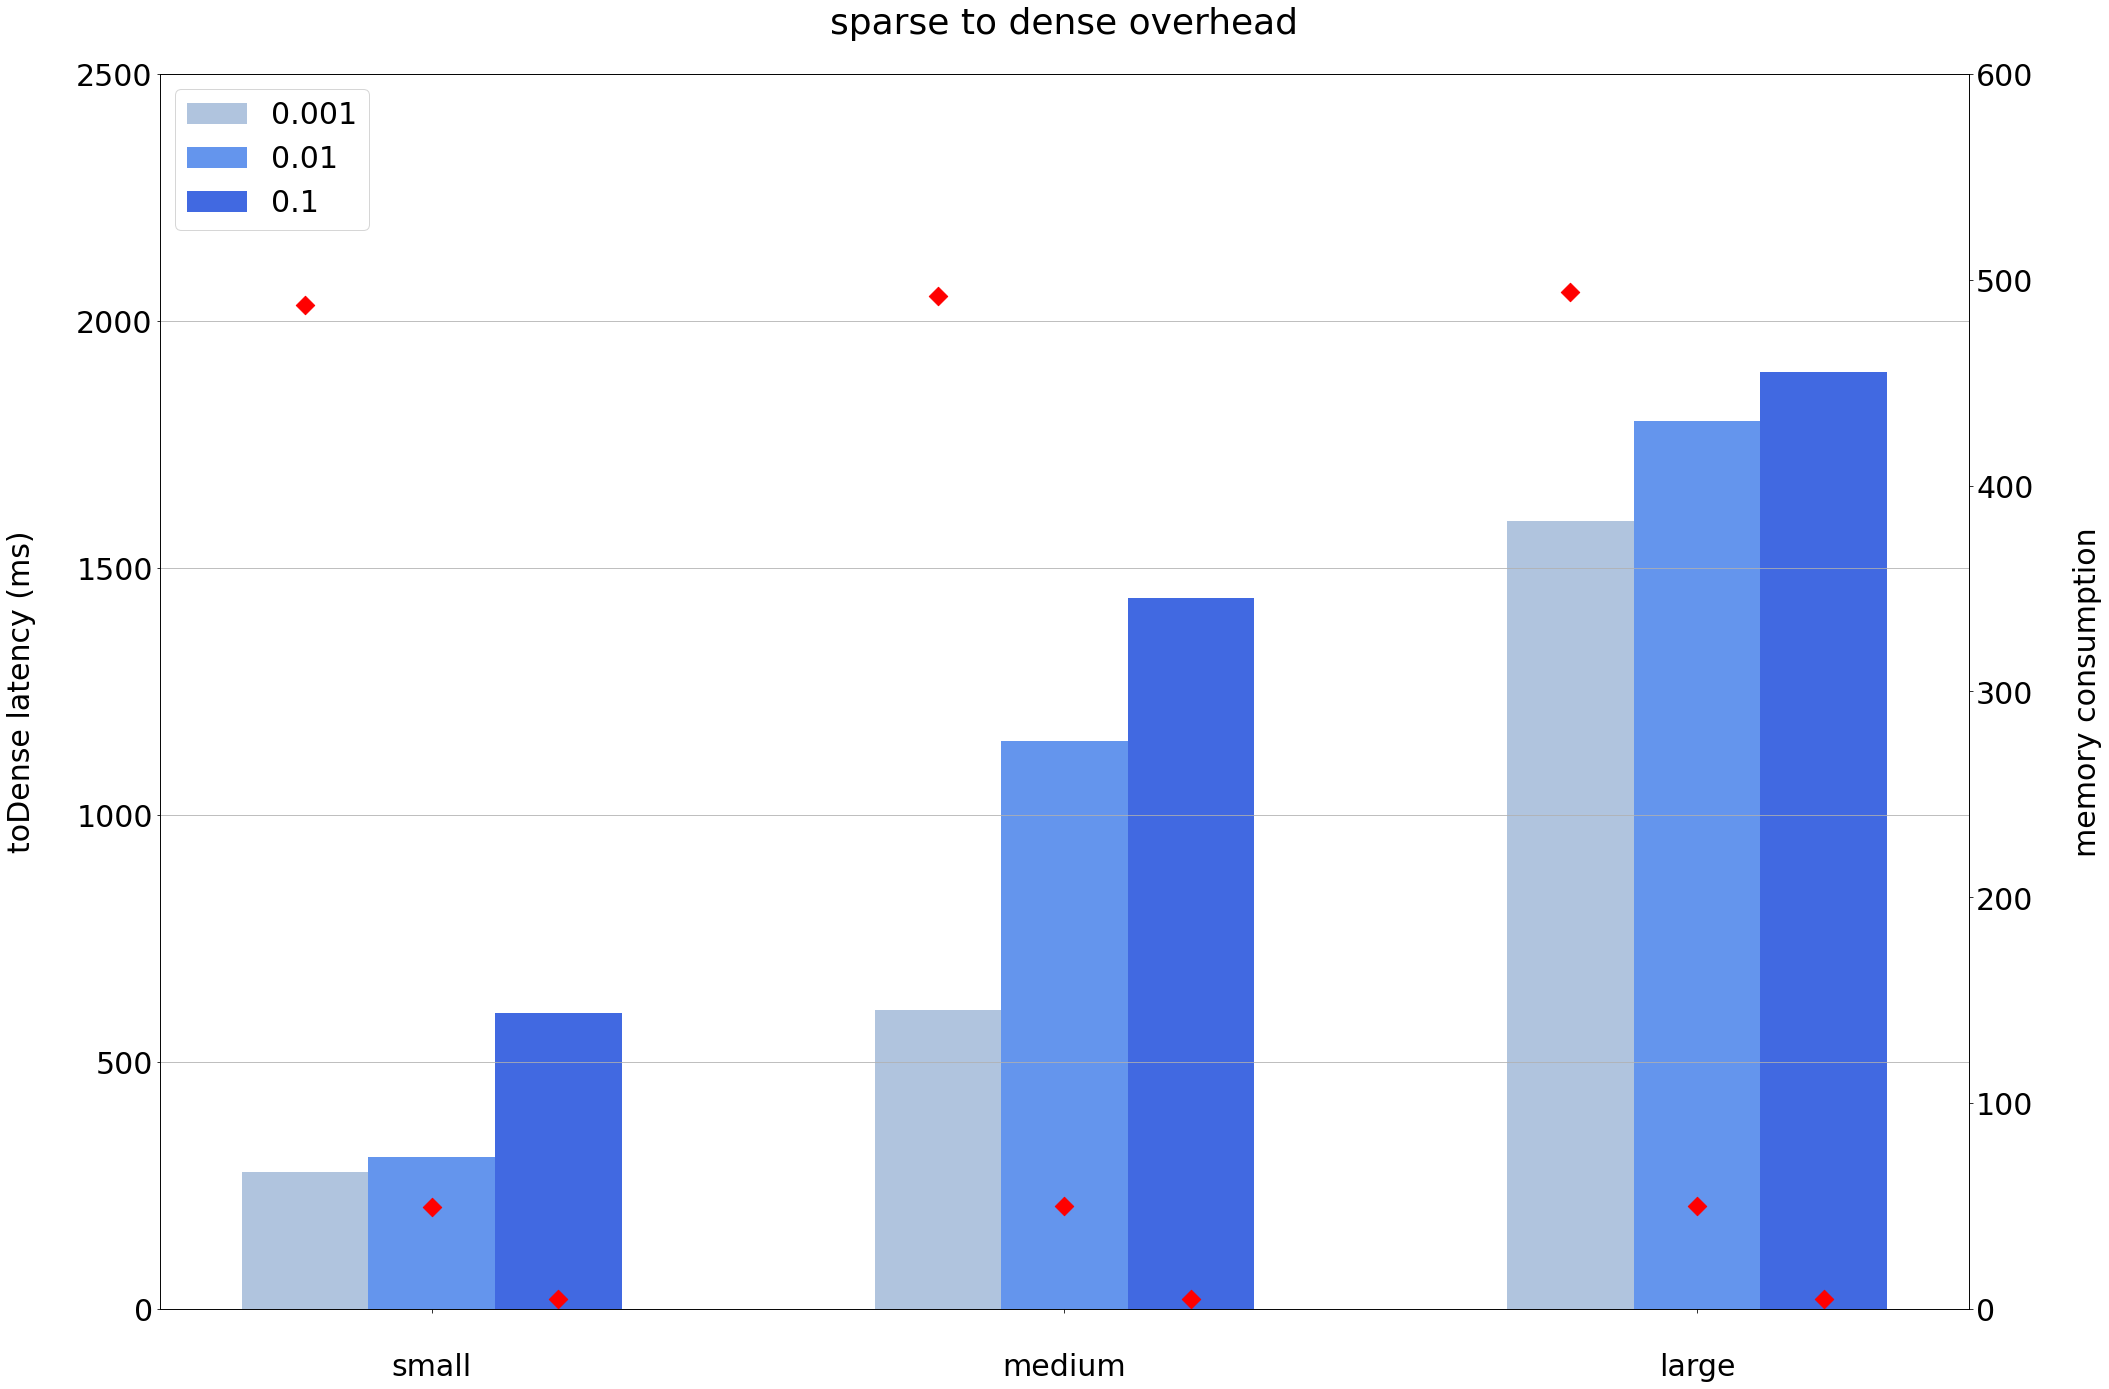

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정

sm_size = ["small", "medium", "large"]

################################# ax1 좌측 y ####################################################

# density 가 0.001 인 각 행렬의 sm to dense latency
sm_to_dense_0_001 = [276.79, 605.84, 1595.14]
min_0_001 = [231, 415, 469]
max_0_001 = [887, 4867, 2481]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_001':sm_to_dense_0_001, 'min_0_001': min_0_001, 'max_0_001': max_0_001}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_001 - df.min_0_001
df['maxgap'] = df.max_0_001 - df.sm_to_dense_0_001
yerr_0_001 = df[['mingap', 'maxgap']].T.to_numpy()


# density 가 0.01 인 각 행렬의 sm to dense latency
sm_to_dense_0_01 = [308.07, 1150.21, 1797.5]
min_0_01 = [299, 455, 617]
max_0_01 = [369, 2672, 3024]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_01':sm_to_dense_0_01, 'min_0_01': min_0_01, 'max_0_01': max_0_01})

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_01 - df.min_0_01
df['maxgap'] = df.max_0_01 - df.sm_to_dense_0_01
yerr_0_01 = df[['mingap', 'maxgap']].T.to_numpy()


# density 가 0.1 인 각 행렬의 sm to dense latency
sm_to_dense_0_1 = [599.01, 1439.99, 1896.14]
min_0_1 = [304, 980, 1318 ]
max_0_1 = [2384, 4235, 5715 ]
df = pd.DataFrame({'sm_size':sm_size,'sm_to_dense_0_1':sm_to_dense_0_1, 'min_0_1': min_0_1, 'max_0_1': max_0_1})

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.sm_to_dense_0_1 - df.min_0_1
df['maxgap'] = df.max_0_1 - df.sm_to_dense_0_1
yerr_0_1 = df[['mingap', 'maxgap']].T.to_numpy()

################################# ax1 우측 y ####################################################

# sm / dm
# small_memory_comsumption = [0.0021, 0.0201, 0.2001]
# medium_memory_comsumption = [0.00205, 0.02005, 0.20005]
# large_memory_comsumption = [0.002025, 0.020025, 0.200025]

# dm / sm
small_memory_comsumption = [487.8048780488, 49.8753117207, 4.9987503124]
medium_memory_comsumption = [491.8032786885, 49.9168053245, 4.9991668055]
large_memory_comsumption = [493.8271604938,  49.9375780275, 4.9993750781]


################################# x축 및 전체 figure 설정 ####################################################


x = np.arange(len(sm_size)) # x축 인덱스
width = 0.2 # bar 넓이

fig, ax1 = plt.subplots(figsize=(30,20)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x-0.2, sm_to_dense_0_001, width, label='0.001', color='lightsteelblue', capsize=20)
bar2 = ax1.bar(x, sm_to_dense_0_01, width, label='0.01', color='cornflowerblue', capsize=20)
bar3 = ax1.bar(x + 0.2, sm_to_dense_0_1, width, label='0.1', color='royalblue', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(sm_size) # x축 label 이름
ax1.tick_params(axis='x',pad=40) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 2500])  # 좌측 y축 범위 설정
ax1.set_ylabel('toDense latency (ms)', labelpad=40) # ax1 ylabel 설정

ax1.set_title('sparse to dense overhead', pad=40) # ax1 title 설정
ax1.legend(loc='upper left') # 범례 표시

# 바 상단에 y축 값 표시
#ax1.bar_label(bar1, padding=3)
#ax1.bar_label(bar2, padding=3)
#ax1.bar_label(bar3, padding=3)

################################# ax2 ####################################################

ax2 = ax1.twinx()  # 동일한 x 축을 공유하는 두 번째 y축 생성

ax2.set_ylim([0, 600])  # 우측 y축 범위 설정
ax2.set_ylabel('memory consumption', labelpad=40) # ax2 ylabel 설정

x_small = np.array([-0.2, 0, 0.2])
x_medium = np.array([0.8, 1, 1.2])
x_large = np.array([1.8, 2, 2.2])
# ax2.plot(x_small, small_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)
# ax2.plot(x_medium, medium_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)
# ax2.plot(x_large, large_memory_comsumption, color='red', marker='o', linestyle='solid', linewidth=3.0)

ax2.scatter(x_small, small_memory_comsumption, color='red', marker='D', s=170)
ax2.scatter(x_medium, medium_memory_comsumption, color='red', marker='D', s=170)
ax2.scatter(x_large, large_memory_comsumption, color='red', marker='D', s=170)


ax2.tick_params(axis='y')


fig.tight_layout()
fig.savefig('./sparse-to-dense-overhead.png')
plt.show()


In [ ]:
# 우측 y 계산하기 (메모리 계산량 확인은 뭘로?)